In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
model = cv2.dnn.readNet("C:\\Users\\sudat\\darknet\\data\\yolov4.weights", "C:\\Users\\sudat\\darknet\\cfg\\yolov4.cfg")

In [5]:
with open("C:\\Users\\sudat\\darknet\\data\\coco.names", "r") as f:
    classes = f.read().strip().split("\n")

In [6]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
image = cv2.imread("C:\\Users\\sudat\\Downloads\\Transpo-660781232w.webp")

In [8]:
imaging_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

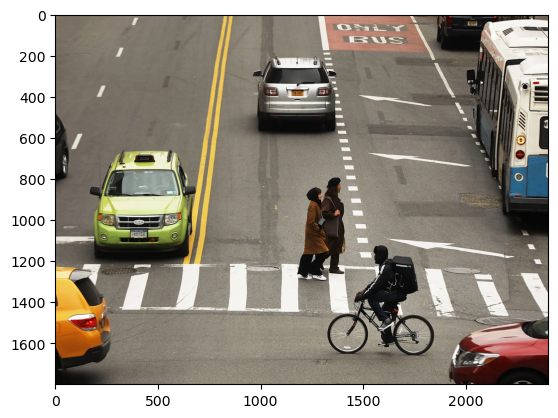

In [9]:
plt.imshow(imaging_rgb)

In [10]:
print(image)

[[[107 131 143]
  [107 131 143]
  [107 131 143]
  ...
  [ 86 103 119]
  [ 86 103 119]
  [ 86 103 119]]

 [[107 131 143]
  [107 131 143]
  [107 131 143]
  ...
  [ 86 103 119]
  [ 86 103 119]
  [ 86 103 119]]

 [[107 131 143]
  [107 131 143]
  [107 131 143]
  ...
  [ 86 103 119]
  [ 86 103 119]
  [ 86 103 119]]

 ...

 [[  7  10   9]
  [  7  10   9]
  [  7  10   9]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[  7  10   9]
  [  7  10   9]
  [  7  10   9]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[  7  10   9]
  [  7  10   9]
  [  7  10   9]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]]


In [11]:
height, width = image.shape[:2]

In [12]:
height

1800

In [13]:
width

2400

In [14]:
image.shape

(1800, 2400, 3)

In [15]:
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
model.setInput(blob)

In [16]:
layer_names = model.getUnconnectedOutLayersNames()

In [17]:
print(layer_names)

('yolo_139', 'yolo_150', 'yolo_161')


In [18]:
detections = model.forward(layer_names)

In [19]:
conf_threshold = 0.90
classIds = []
confidences = []
boxes = []
objects_detected = []

In [20]:
for detection in detections:
    for obj in detection:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > conf_threshold:
            center_x = int(obj[0] * width)
            center_y = int(obj[1] * height)
            w = int(obj[2] * width)
            h = int(obj[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            classIds.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
            objects_detected.append((x, y, x + w, y + h))

In [21]:
nmsThreshold = 0.3
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nmsThreshold)


In [22]:
indices

array([23,  8,  1, 18, 26,  7, 28, 25, 22])

In [33]:
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    class_id = classIds[i]
    confidence = confidences[i]
    
    color = (0, 255, 0)  # Green color
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    label = f"{classes[class_id]}: {confidence:.2f}"
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

In [34]:
max_display_width = 1000 

In [35]:
if width > max_display_width:
    scaling_factor = max_display_width / width
else:
    scaling_factor = 1.0

In [36]:
display_image = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor)

In [37]:
cv2.imshow("Object Detection", display_image)
cv2.waitKey(0)
cv2.destroyAllWindows()